# 使用梯度上升法实现PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2)) 

In [3]:
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 * X[:,0] + 3. +np.random.normal(0,10.,size=100)

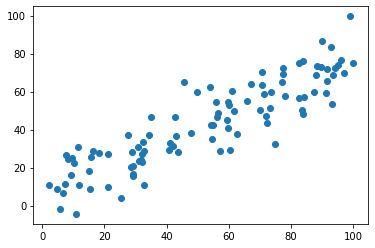

In [4]:
plt.scatter(X[:,0],X[:,1])

demean

In [5]:
def demean(X):
    return X - np.mean(X,axis=0)

In [6]:
X_demean = demean(X)

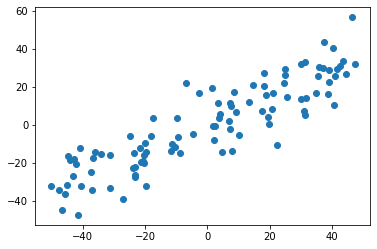

In [7]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

In [8]:
np.mean(X_demean[:,0])

6.1106675275368615e-15

In [9]:
np.mean(X_demean[:,1])

1.8687273950490634e-14

# 梯度上升法

In [10]:
def f(w,X):
    return np.sum((X.dot(w))**2) / len(X)

In [12]:
def df_math(w,X):
    return X.T.dot(X.dot(w)) * 2 / len(X)

In [11]:
# 得到单位方向向量
def direction(w):
    return w / np.linalg.norm(w)

In [28]:
def gradient_ascent(df_math,X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df_math(w,X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w,X) - f(last_w,X)) < epsilon):
            break
        cur_iter += 1
    return w

In [29]:
# w不能初始化为0向量，因为这样梯度也为0
initial_w = np.random.random(X.shape[1])  

In [30]:
initial_w

array([0.90070517, 0.14577071])

In [31]:
eta = 0.001
# 注意3： 不能使用StandardScaler标准化数据

In [32]:
gradient_ascent(df_math,X_demean,initial_w,eta)

array([0.78645558, 0.61764685])

In [39]:
w = gradient_ascent(df_math,X_demean,initial_w,eta)

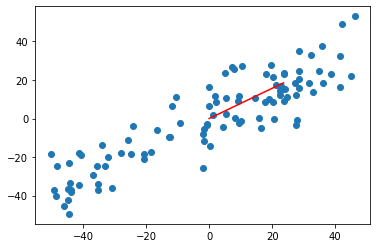

In [40]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],color='r')
plt.show()

使用极端数据集测试

In [45]:
X2 = np.empty((100,2))
X2[:,0] = np.random.uniform(0.,100.,size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

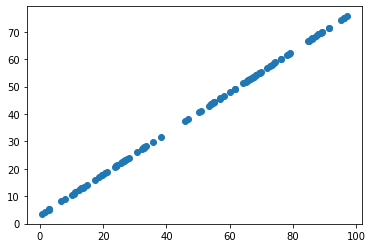

In [46]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [47]:
X2_demean = demean(X2)

In [48]:
w2 = gradient_ascent(df_math,X2_demean,initial_w,eta)

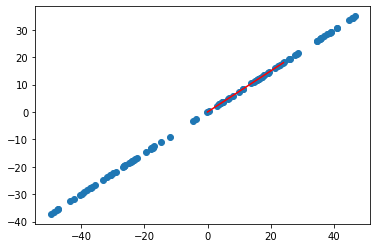

In [49]:
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

# 获得前n个主成分

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [15]:
def demean(X):
    return X - np.mean(X, axis=0)

In [16]:
X = demean(X)

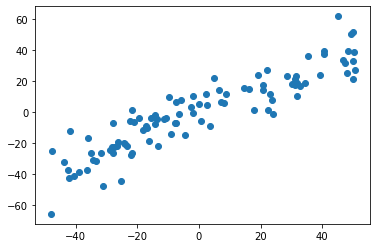

In [17]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [18]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) 
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [19]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X,initial_w,eta)
w

array([0.77001724, 0.63802308])

In [20]:
X2 = np.empty(X.shape)
for i in range(len(X)):
#   X[i].dot(w) * w   意为w方向上的分量大小
#   X[i]意为总大小
#   X2[i]意为剩余垂直分量上的大小
    X2[i] = X[i] - X[i].dot(w) * w 

In [24]:
# 向量化实现
X2 = X - X.dot(w).reshape(-1,1) * w

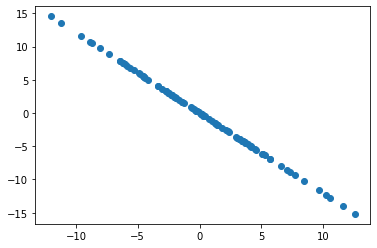

In [25]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [75]:
# 得到第二主成分
w2 = first_component(X2,initial_w,eta)
w2

array([ 0.62528066, -0.78039996])

In [76]:
# 第二主成分与第一主成分垂直
w.dot(w2)

3.4563141744770043e-06

In [83]:
# 向量化操作
X2 = X - X.dot(w).reshape(-1,1)*w

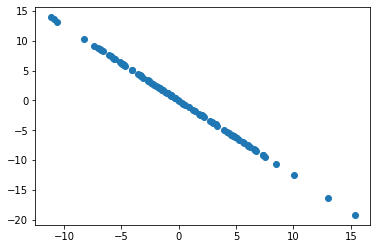

In [93]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [22]:
w2 = first_component(X2,initial_w,eta)
w2

array([-0.63801826,  0.77002124])

In [23]:
w.dot(w2)

6.259103639827401e-06

In [26]:
def first_n_components(n,X,eta=0.01,n_iters=1e4,epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca,initial_w,eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1) * w
        
    return res

In [27]:
first_n_components(2,X)  

[array([0.7700172 , 0.63802313]), array([-0.63802056,  0.77001933])]

# 从高维数据向低维数据的映射

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [3]:
from PCA import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [4]:
pca.components_

array([[ 0.79490731,  0.60673089],
       [-0.60672837,  0.79490923]])

In [5]:
pca = PCA(n_components=1)

In [6]:
pca.fit(X)

PCA(n_components=1)

In [7]:
X_reduction = pca.transform(X)

In [8]:
X_reduction.shape

(100, 1)

In [9]:
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(100, 2)

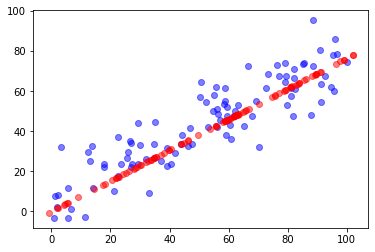

In [11]:
plt.scatter(X[:,0],X[:,1],color = 'b',alpha=0.5)
plt.scatter(X_restore[:,0],X_restore[:,1],color = 'r',alpha=0.5)
plt.show()

scikit-learn中的PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [14]:
pca.components_

array([[-0.79490735, -0.60673083]])

In [15]:
X_reduction = pca.transform(X)

In [16]:
X_reduction.shape

(100, 1)

In [17]:
X_restore = pca.inverse_transform(X_reduction)

In [18]:
X_restore.shape

(100, 2)

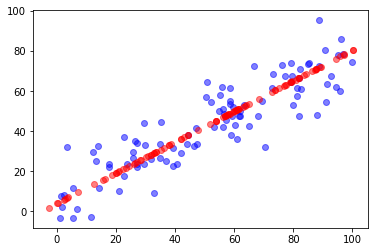

In [19]:
plt.scatter(X[:,0],X[:,1],color = 'b',alpha=0.5)
plt.scatter(X_restore[:,0],X_restore[:,1],color = 'r',alpha=0.5)
plt.show()

# 真实数据digits的PCA

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [21]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [24]:
from sklearn.model_selection import  train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [25]:
X_train.shape

(1347, 64)

In [26]:
%%time 
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

Wall time: 23.9 ms


KNeighborsClassifier()

In [27]:
knn_clf.score(X_test,y_test)

0.9866666666666667

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [29]:
%%time 
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction,y_train)

Wall time: 1.99 ms


KNeighborsClassifier()

In [30]:
knn_clf.score(X_test_reduction,y_test)

0.6066666666666667

In [31]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [32]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)

PCA(n_components=64)

In [34]:
# 表示每一个方向轴的重要程度
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

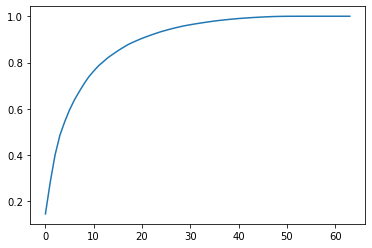

In [36]:
# sum(i+1)表示前i个元素的和
plt.plot([i for i in range(X_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])

In [37]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [38]:
pca.n_components_

28

In [39]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [40]:
%%time 
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction,y_train)

Wall time: 6.98 ms


KNeighborsClassifier()

In [42]:
# 虽然训练出来的精度丢失了一些，但是效率却大大提高了
knn_clf.score(X_test_reduction,y_test)

0.98

# PCA降维到两维的意义-可以方便可视化展示，帮助人们理解

下图每个颜色代表一个数字在降维到二维空间中的分布情况 仔细观察后可以发现，很多数字的区分还是比较明细的 比如如果只是区分蓝色的数字和紫色的数字，那么使用二个维度就足够了

In [43]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [44]:
X_reduction = pca.transform(X)

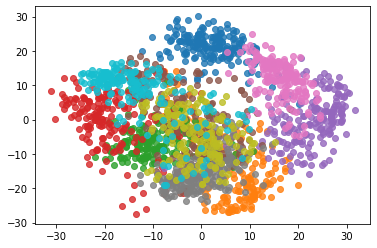

In [46]:
for i in range(10):
    plt.scatter(X_reduction[y==i,0],X_reduction[y==i,1],alpha=0.8)

# MNIST

In [51]:
import numpy as np
from sklearn.datasets import fetch_openml

In [54]:
mnist = fetch_openml('mnist_784')

In [58]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [56]:
X , y = mnist['data'],mnist['target'] 

In [57]:
X.shape

(70000, 784)

In [81]:
X_train = np.array(X[:60000],dtype=float)
X_test = np.array(X[60000:],dtype=float)
y_train = np.array(y[:60000],dtype=float)
y_test = np.array(y[60000:],dtype=float)

In [60]:
X_train.shape

(60000, 784)

In [62]:
X_test.shape

(10000, 784)

# 使用kNN

sklearn 封装的KNeighborsClassifier，在fit过程中如果数据集较大，会以树结构的过程进行存储，以加快knn的预测过程，但是会导致fit过程变慢 没有进行数据归一化，是因为这里的每个维度都标示的是每个像素点的亮度，他们的尺度是相同的，这个时候比较两个样本之间的距离是有意义的

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train,y_train)

Wall time: 1min 10s


KNeighborsClassifier()

In [ ]:
%time knn_clf.score(X_test,y_test)

# PCA降维

In [68]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(0.9)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)

In [71]:
X_train_reduction.shape

(60000, 87)

In [72]:
X_test_reduction = pca.transform(X_test)

In [75]:
knn_clf = KNeighborsClassifier()

In [79]:
%time knn_clf.fit(X_train_reduction,y_train)

Wall time: 2.25 s


KNeighborsClassifier()

In [82]:
knn_clf.score(X_test_reduction,y_test)

0.9728

使用PCA进行降维后的数据集进行训练，不光时间变短了，准确度也变高了 这是因为PCA的过程中，不仅仅是进行了降维，还在降维的过程中将数据包含的噪音给消除了 这使得我们可以更加好的，更加准确的拿到我们数据集对应的特征，从而使得准确率大大提高

# 8.使用PCA对数据进行降噪

回忆之前的例子

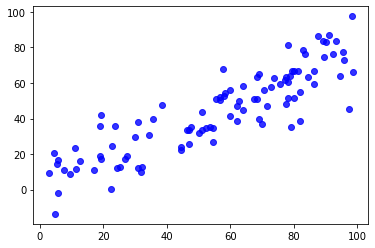

In [83]:
import numpy as np
import matplotlib.pyplot as plt
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size=100)
# 0.75倍的X[:,0]加上3加上一个噪音
X[:,1] = 0.75*X[:,0]+3.+np.random.normal(0.,10.,size=100)
plt.scatter(X[:,0],X[:,1],color='b',alpha=0.8)

现在有一个问题：这个数据集展现出来这样的结果，可是是不是有这样一种情况，这个数据集就应该是一根直线呢 换句话说，这个数据集展现的是在一根直线上下进行抖动式的分布，实际上这种抖动和这根直线本身的距离是噪音 这个噪音的产生原因可能有很多，如测量人员的粗心，测量手段有问题等等原因，都会使得我们在现实世界中采集的数据 是有噪音的

In [84]:
from sklearn.decomposition import PCA

In [85]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [86]:
X_reduction = pca.transform(X)

In [87]:
X_restore = pca.inverse_transform(X_reduction)

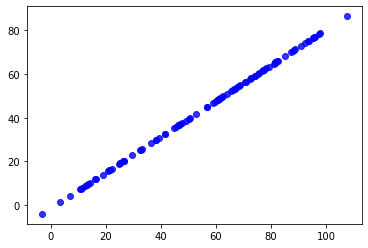

In [88]:
plt.scatter(X_restore[:,0],X_restore[:,1],color='b',alpha=0.8)

我们使用PCA进行降维然后在反转回原来的维度，经过这样一个操作，可以发现此时这个数据 就成为了一条直线，比较一下这两个图，我们可以说，经过这样的操作，我们将原有数据集的噪音 给消除了 当然，在实际情况下，我们不好说X_restore就是一点噪音都没有，也不好说原数据的所有的抖动全都是 噪音，所以我们还是倾向于说从X到X_restore丢失了一些信息，不过我们丢失的信息很有可能有很大的一部分 是噪音，这也解释了为什么我们在上一节降维处理以后，反而识别率提高了

# 总结一句话就是：降低了维度，丢失了信息，同时也去除了一部分噪音

手写识别的例子

In [89]:
from sklearn import datasets

digits = datasets.load_digits()
X,y = digits.data,digits.target

In [90]:
noisy_digits = X + np.random.normal(0,4,size=X.shape)

In [93]:
# 获得每个标记加了噪音的10个元素，一共10个标记，公100个元素
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits,X_num])
example_digits.shape

(100, 64)

In [94]:
# 画出带噪音的图像
def plot_digits(data):
    fig,axes = plt.subplots(10,10,figsize=(10,10),
                           subplot_kw={'xticks':[],'yticks':[]},
                            gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                  cmap='binary',
                  interpolation='nearest',
                  clim=(0,16))

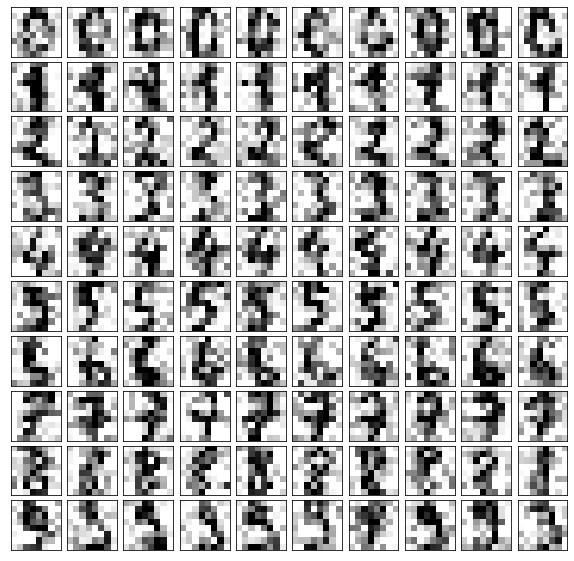

In [95]:
plot_digits(example_digits)

使用PCA降噪

In [96]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(n_components=0.5)

In [97]:
pca.n_components_

12

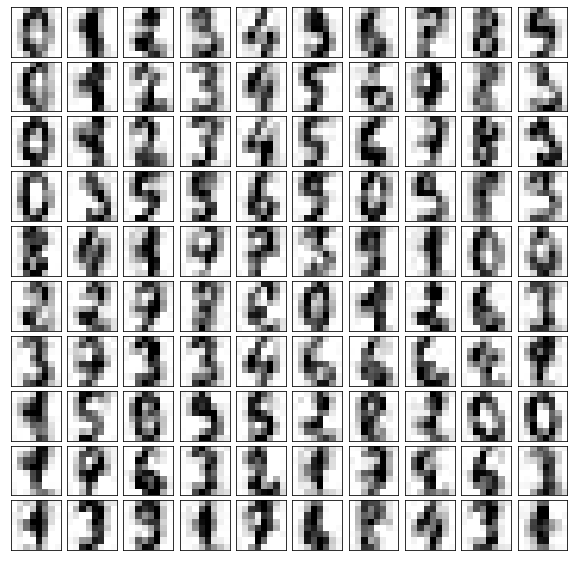

In [98]:
components = pca.transform(noisy_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)

# 相比之前，数字清楚了很多，平滑了很多，说明使用PCA进行降噪是可行的

# 9.人脸识别与特征脸

1.加载人脸数据库

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [100]:
faces = fetch_lfw_people()

In [103]:
faces.data.shape

(13233, 2914)

In [104]:
# images是将我们的数据集以一个二维平面可视化的角度展现出来
# 62*47 = 2914
faces.images.shape

(13233, 62, 47)

In [105]:
# 随机获取36张脸
random_indexs = np.random.permutation(len(faces.data))
X = faces.data[random_indexs]
example_faces = X[:36,:]
example_faces.shape

(36, 2914)

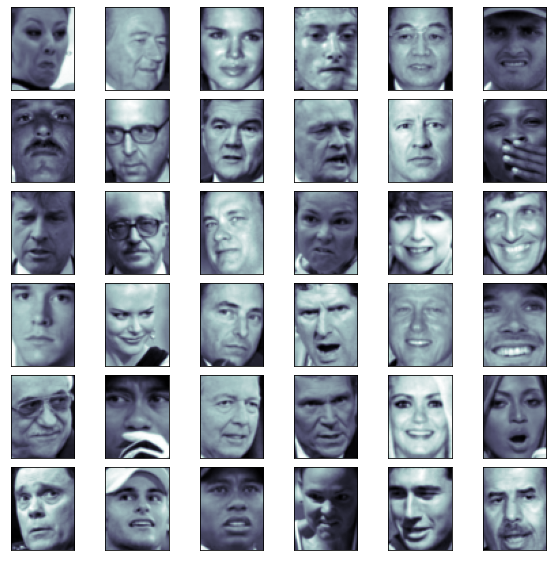

In [106]:
def plot_digits(data):
    fig,axes = plt.subplots(6,6,figsize=(10,10),
                           subplot_kw={'xticks':[],'yticks':[]},
                            gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62,47),cmap='bone')
plot_digits(example_faces)

In [112]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [113]:
len(faces.target_names)

5749

2.特征脸

In [116]:
%%time
X,y = faces.data,faces.target
from sklearn.decomposition import PCA
# 使用随机的方式来求解出PCA
# 没有指定n_componets ，也就是说想求出所有的主成分
pca = PCA(svd_solver='randomized')
pca.fit(X)

Wall time: 41.7 s


PCA(svd_solver='randomized')

In [118]:
# 一共2914个维度，所以求出了2914个主成分
pca.components_.shape

(2914, 2914)

使用所有的主成分绘制特征脸

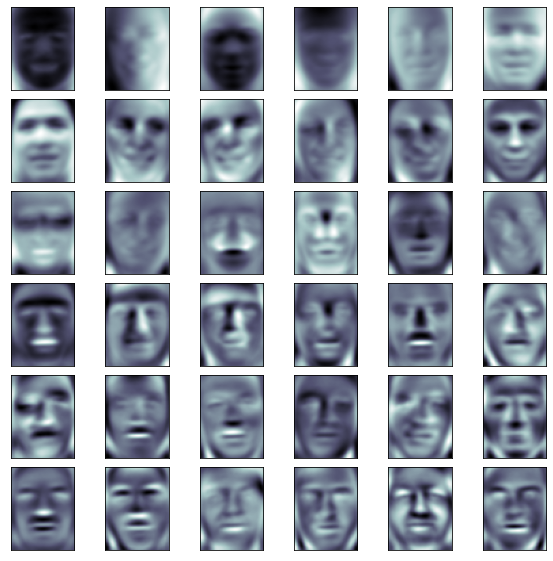

In [120]:
plot_digits(pca.components_[:36])

由于fetch_lfw_people这个库的人脸是分布不均匀的，有的人可能只有一张图片，有的人有几十张 通过这个方法我们可以取出至少有60张脸的人的数据

In [121]:
face2 = fetch_lfw_people(min_faces_per_person=60)

In [122]:
X,y = face2.data,face2.target

In [128]:
len(face2.target_names)

8

一共有8个人有60张以上照片